In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3

###  Data Extraction

In [81]:
###Database Connection
Database = r"C:\Users\TaLaL\Desktop\SDAIA\Students.db"
Conn = sqlite3.connect(Database)
df = pd.read_sql_query("SELECT * from Exams" , con=Conn)
Conn.close()

In [87]:
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0
3,male,group B,high school,standard,none,72.0,64.0,59.0
4,female,group B,high school,standard,none,73.0,94.0,91.0


In [131]:
df.dtypes

Gender                          object
Race_Ethnicity                  object
Parental_level_of_education     object
Lunch                           object
Test_preparation_course         object
Math_score                     float64
Reading_score                  float64
Writing_score                  float64
Math_PassStatus                 object
Reading_PassStatus              object
percentage                     float64
Percentage                     float64
dtype: object

In [132]:
df.describe()

,Math_score,Reading_score,Writing_score,percentage,Percentage
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,66.722161,69.705563,68.542300,68.321597,68.321597
std,15.233153,14.610838,15.263756,14.305016,14.305016
min,6.000000,14.000000,8.000000,10.000000,10.000000
25%,56.000000,60.000000,58.000000,59.000000,59.000000
50%,67.000000,70.000000,69.000000,69.000000,69.000000
75%,77.000000,80.000000,79.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


### Data Cleaning

In [89]:
##Check for missing values
df.isnull().sum()

Gender                         0
Race_Ethnicity                 1
Parental_level_of_education    1
Lunch                          1
Test_preparation_course        1
Math_score                     1
Reading_score                  1
Writing_score                  1
dtype: int64

In [99]:
###Remove missing values
df = df[df.Math_score.notnull()]

In [98]:
df.tail()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Math_PassStatus
9995,female,group D,some college,free/reduced,none,62.0,77.0,73.0,P
9996,female,group B,high school,standard,none,26.0,32.0,31.0,F
9997,female,group C,some high school,standard,completed,80.0,92.0,100.0,P
9998,female,group B,some high school,standard,none,52.0,60.0,55.0,P
9999,male,group B,bachelor's degree,standard,none,68.0,65.0,65.0,P


In [114]:
##Check and remove duplicates
df.duplicated().sum()
df.drop_duplicates(keep=False,inplace=True)

In [115]:
## There are the values high school and some high school those are same so we change some high school to high school
df["Parental_level_of_education"]=df["Parental_level_of_education"].str.replace("some high school","high school")

In [120]:
## Make a new perccentage column
df["Percentage"]=(df["Math_score"]+df["Writing_score"]+df["Reading_score"])/3
df["Percentage"]=df.percentage.apply(np.round)
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Math_PassStatus,Reading_PassStatus,percentage,Percentage
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0,P,P,83.0,83.0
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0,P,P,81.0,81.0
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0,P,P,73.0,73.0
3,male,group B,high school,standard,none,72.0,64.0,59.0,P,P,65.0,65.0
4,female,group B,high school,standard,none,73.0,94.0,91.0,P,P,86.0,86.0


## Data Visualization

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


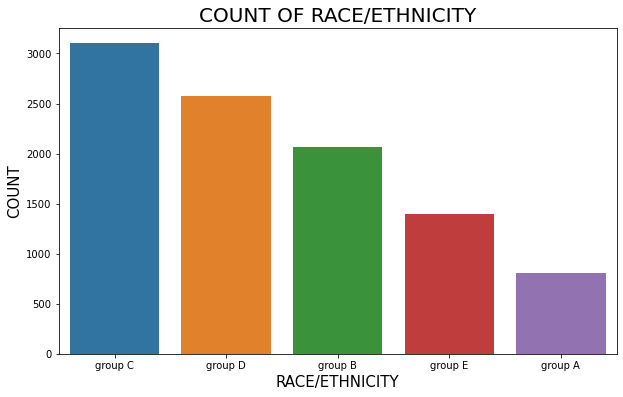

In [135]:
## Count of race/ethnicity
plt.figure(figsize=(10,6))
sns.countplot(df["Race_Ethnicity"])
plt.title("COUNT OF RACE/ETHNICITY",fontsize=20)
plt.xlabel("RACE/ETHNICITY",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


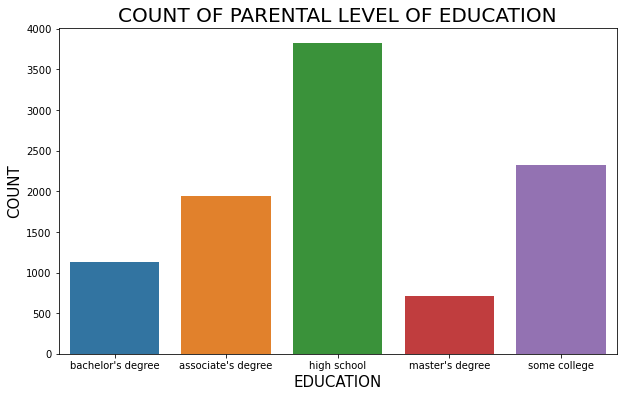

In [137]:
## Count of Parental level of education
plt.figure(figsize=(10,6))
sns.countplot(df["Parental_level_of_education"])
plt.title("COUNT OF PARENTAL LEVEL OF EDUCATION",fontsize=20)
plt.xlabel("EDUCATION",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

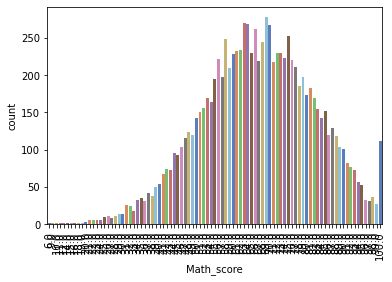

In [94]:
## Set the pass score
passmark = 40
p = sns.countplot(x="Math_score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


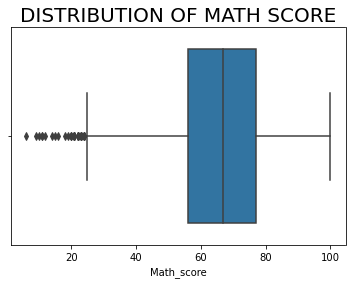

In [138]:
## Distribution of Math score
sns.boxplot(df["Math_score"])
plt.title("DISTRIBUTION OF MATH SCORE",fontsize=20)
plt.show()

In [148]:
## Students passed Math
df['Math_PassStatus'] = np.where(df['Math_score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    9544
F     397
Name: Math_PassStatus, dtype: int64

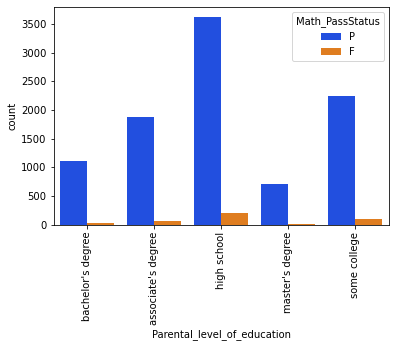

In [121]:
p = sns.countplot(x='Parental_level_of_education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

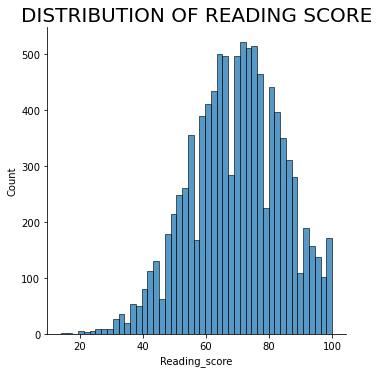

In [140]:
## Distribution of Reading score
sns.displot(df["Reading_score"])
plt.title("DISTRIBUTION OF READING SCORE",fontsize=20)
plt.show()

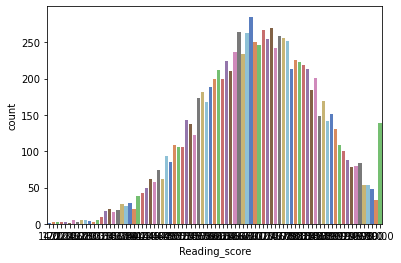

In [147]:
sns.countplot(x="Reading_score", data = df, palette="muted")
plt.show()

In [156]:
## Students passed Reading
df['Reading_PassStatus'] = np.where(df['Reading_score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    9715
F     226
Name: Reading_PassStatus, dtype: int64

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


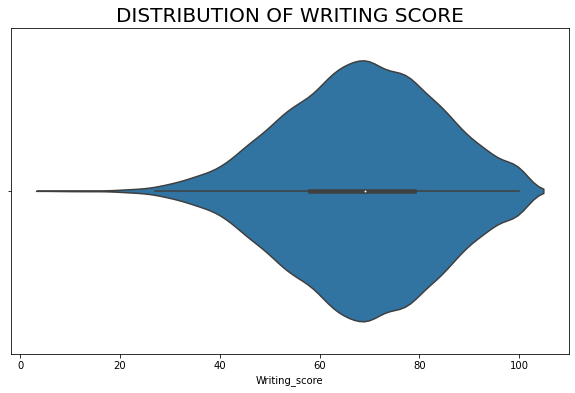

In [150]:
## Distribution of Writing score
plt.figure(figsize=(10,6))
sns.violinplot(df["Writing_score"])
plt.title("DISTRIBUTION OF WRITING SCORE",fontsize=20)
plt.show()

In [146]:
## Students passed Writing
df['Writing_PassStatus'] = np.where(df['Writing_score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    9620
F     321
Name: Writing_PassStatus, dtype: int64

In [143]:
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Math_PassStatus,Reading_PassStatus,percentage,Percentage
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0,P,P,83.0,83.0
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0,P,P,81.0,81.0
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0,P,P,73.0,73.0
3,male,group B,high school,standard,none,72.0,64.0,59.0,P,P,65.0,65.0
4,female,group B,high school,standard,none,73.0,94.0,91.0,P,P,86.0,86.0


In [151]:
## Students passed in all subjects
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

In [152]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

C    2548
B    2435
A    2313
D    1614
F     559
E     472
Name: Grade, dtype: int64

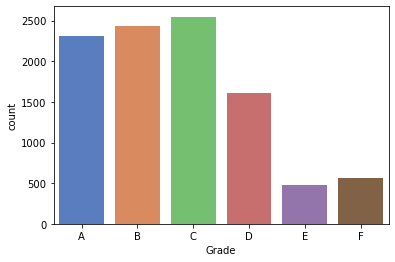

<Figure size 432x288 with 0 Axes>

In [160]:
## Grades plot
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()
plt.savefig("grades.png", dpi=400)

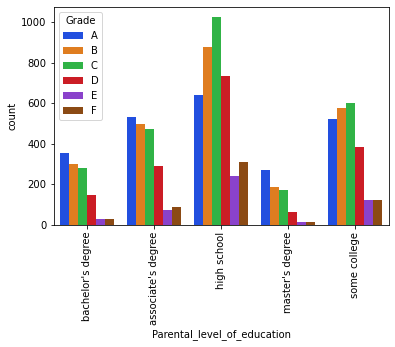

In [159]:
## Parent level of education influence on grades plot
p = sns.countplot(x='Parental_level_of_education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.savefig("PLE.png", dpi=250)